In [58]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#This gives us a whitegrid background
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [194]:
#Grabbing data a year ago from now till the current day. 
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [195]:
#Creating a DataFrame that has all the yahoo information for BTC and ETH 
closing_df = DataReader(['BTC-USD','ETH-USD'],'yahoo',start,end)['Adj Close']

In [196]:
closing_df.head()

Symbols,BTC-USD,ETH-USD
Date,,
2017-09-10,4217.899902,297.950012
2017-09-11,4158.919922,294.100006
2017-09-12,3870.290039,275.839996
2017-09-13,3243.080078,223.139999
2017-09-14,3713.760010,259.570007


In [64]:
#Creating a returns column that gives us information on the return of each coin. 
returns = closing_df.pct_change()

In [65]:
returns.head()

Symbols,BTC-USD,ETH-USD
Date,,
2017-09-09,NaN,NaN
2017-09-10,-0.006592,-0.004211
2017-09-11,-0.013983,-0.012922
2017-09-12,-0.069400,-0.062088
2017-09-13,-0.162058,-0.191053


In [71]:
#The volume of trading for each of the coins 
volume = DataReader(['BTC-USD','ETH-USD'],'yahoo',start,end)['Volume']

In [199]:
#Grabbing data from Yahoo on Bitcoin and storing it in BTC 
BTC = DataReader(['BTC-USD'],'yahoo',start,end)
BTC.head()

Attributes,High,Low,Open,Close,Volume,Adj Close
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2017-09-10,4364.419922,4134.620117,4245.890137,4217.899902,375254125,4217.899902
2017-09-11,4387.759766,4074.969971,4217.899902,4158.919922,453402207,4158.919922
2017-09-12,4174.580078,3752.010010,4158.919922,3870.290039,728385231,3870.290039
2017-09-13,3930.689941,3218.979980,3870.290039,3243.080078,1118258889,3243.080078
2017-09-14,3824.429932,2979.879883,3243.080078,3713.760010,1519153953,3713.760010


In [200]:
#Grabbing data from Yahoo on Etherium and storing it in ETH 
ETH = DataReader(['ETH-USD'],'yahoo',start,end)
ETH.head()

Attributes,High,Low,Open,Close,Volume,Adj Close
Symbols,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Date,,,,,,
2017-09-10,308.299988,288.600006,299.209991,297.950012,149130023,297.950012
2017-09-11,316.380005,285.750000,297.950012,294.100006,212949898,294.100006
2017-09-12,294.390015,257.160004,294.100006,275.839996,328829086,275.839996
2017-09-13,280.649994,222.059998,275.839996,223.139999,448360655,223.139999
2017-09-14,267.700012,200.750000,223.139999,259.570007,601118554,259.570007


In [72]:
#A quick glance at the volume trading of each coin
volume.head()

Symbols,BTC-USD,ETH-USD
Date,,
2017-09-09,451244396,179819553
2017-09-10,375254125,149130023
2017-09-11,453402207,212949898
2017-09-12,728385231,328829086
2017-09-13,1118258889,448360655


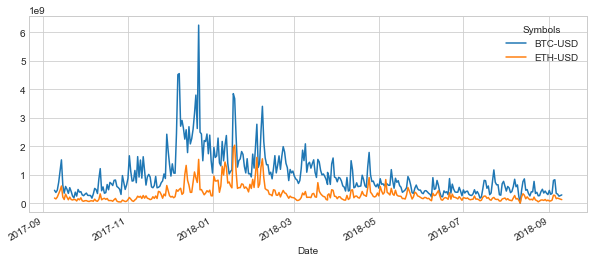

In [75]:
#Making a line graph that shows both of the volume trading for each coin. 
#This highllights that both the coins are correelated in terms of volume trading however it is clear that BTC is 
#traded at a much higher rate 
volume.plot(legend = True, figsize = (10,4))

/Users/zaidshtayyeh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/zaidshtayyeh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


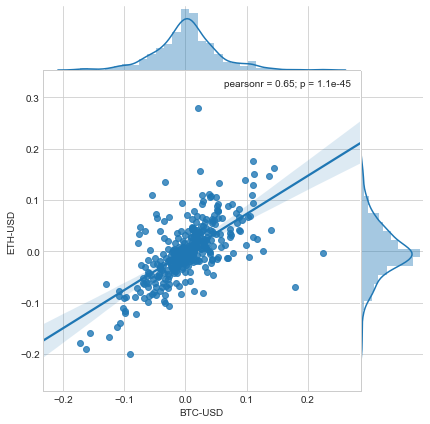

In [96]:
#Now that we know there is a lose relationship between volume of the coins, what is the actual correlation like?
#By creating a jointplot we can examine the correlation between the two coins. 
sns.jointplot('BTC-USD','ETH-USD',data=returns,kind = 'reg', space = .01)

In [68]:
#This graph highlights the correlation between ETH and BTC proving that the p value is 0.65 which is strong

In [69]:
#Now lets get more into the specifics of each of these currencies 

In [109]:
#Here we can see a full description of ETH price over the past year 
ETH.describe()

Attributes,High,Low,Open,Close,Volume,Adj Close
Symbols,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
count,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000
mean,574.749699,523.627623,551.871447,551.557950,3.112793e+08,551.557950
std,265.636482,231.610732,250.904504,251.285067,2.882400e+08,251.285067
min,202.589996,185.009995,195.990005,195.990005,0.000000e+00,195.990005
25%,334.452507,309.400009,322.332512,322.325005,1.398535e+08,322.325005
50%,493.575012,459.985001,476.439987,476.439987,2.211861e+08,476.439987
75%,741.100021,675.377487,702.660019,702.622482,3.749370e+08,702.622482
max,1422.859985,1271.069946,1385.020020,1385.020020,2.034011e+09,1385.020020


In [110]:
#Here we can see a full description of the BTC price over the past year 
BTC.describe()

Attributes,High,Low,Open,Close,Volume,Adj Close
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000
mean,8759.198669,8072.507757,8446.285750,8451.045680,9.671816e+08,8451.045680
std,3296.606582,2840.790030,3117.219625,3112.157817,7.738888e+08,3112.157817
min,3753.510010,2979.879883,3243.080078,3243.080078,0.000000e+00,3243.080078
25%,6676.184937,6305.947632,6510.177612,6511.040039,4.481254e+08,6511.040039
50%,7948.510010,7464.225098,7680.870117,7680.870117,7.336352e+08,7680.870117
75%,9809.180420,9121.912109,9593.577881,9593.792725,1.218515e+09,9593.792725
max,19870.619141,18750.910156,19346.599609,19345.490234,6.245732e+09,19345.490234


In [114]:
BTC['Adj Close'].mean()

Symbols
BTC-USD    8451.04568
dtype: float64

In [115]:
ETH['Adj Close'].mean()

Symbols
ETH-USD    551.55795
dtype: float64

In [ ]:
#We can clearly see here that the average BTC closing price is much higher than the average 

In [198]:
#The mean returns are shown to be higher for BTC compared to ETH when talking about returns 
returns.mean()

Symbols
BTC-USD    0.002375
ETH-USD    0.000495
dtype: float64

In [153]:
#This is where we group both data sets BTC and ETH onto the same dataframe 
all_data = pd.concat([ETH,BTC],axis=1)

In [132]:
#Using this we would be able to index a date very easily making comparisons and historical data easy to capture. 
all_data.head()

Attributes,High,Low,Open,Close,Volume,Adj Close,High,Low,Open,Close,Volume,Adj Close
Symbols,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,,,,,,,
2017-09-09,305.760010,280.700012,303.790009,299.209991,179819553,299.209991,4338.080078,4032.149902,4335.129883,4245.890137,451244396,4245.890137
2017-09-10,308.299988,288.600006,299.209991,297.950012,149130023,297.950012,4364.419922,4134.620117,4245.890137,4217.899902,375254125,4217.899902
2017-09-11,316.380005,285.750000,297.950012,294.100006,212949898,294.100006,4387.759766,4074.969971,4217.899902,4158.919922,453402207,4158.919922
2017-09-12,294.390015,257.160004,294.100006,275.839996,328829086,275.839996,4174.580078,3752.010010,4158.919922,3870.290039,728385231,3870.290039
2017-09-13,280.649994,222.059998,275.839996,223.139999,448360655,223.139999,3930.689941,3218.979980,3870.290039,3243.080078,1118258889,3243.080078


In [138]:
all_data.iloc[[0]]

Attributes,High,Low,Open,Close,Volume,Adj Close,High,Low,Open,Close,Volume,Adj Close
Symbols,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,,,,,,,
2017-09-09,305.76001,280.700012,303.790009,299.209991,179819553,299.209991,4338.080078,4032.149902,4335.129883,4245.890137,451244396,4245.890137


In [150]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2017-09-09 to 2018-09-10
Data columns (total 12 columns):
(High, ETH-USD)         366 non-null float64
(Low, ETH-USD)          366 non-null float64
(Open, ETH-USD)         366 non-null float64
(Close, ETH-USD)        366 non-null float64
(Volume, ETH-USD)       366 non-null int64
(Adj Close, ETH-USD)    366 non-null float64
(High, BTC-USD)         366 non-null float64
(Low, BTC-USD)          366 non-null float64
(Open, BTC-USD)         366 non-null float64
(Close, BTC-USD)        366 non-null float64
(Volume, BTC-USD)       366 non-null int64
(Adj Close, BTC-USD)    366 non-null float64
dtypes: float64(10), int64(2)
memory usage: 47.2 KB


In [159]:
#This is a way to get any historical data and compare the two coins very easy 
all_data.iloc[[365]]

Attributes,High,Low,Open,Close,Volume,Adj Close,High,Low,Open,Close,Volume,Adj Close
Symbols,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,,,,,,,
2018-09-10,202.589996,186.919998,195.990005,196.419998,130141200,196.419998,6371.419922,6247.640137,6249.069824,6319.5,295052384,6319.5


In [165]:
g = all_data['Adj Close']

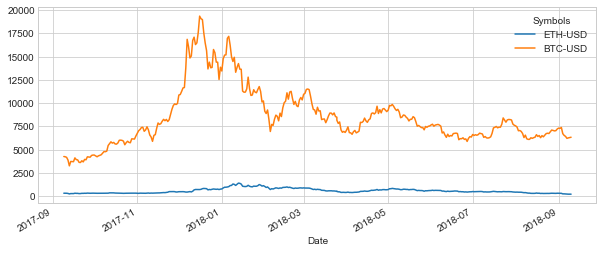

In [167]:
#This is a plot highlighting that BTC is trading at a much higher closing price than ETH. 
#There also seems to be more fluctuation for the price of BTC compared to the price of ETH. 
g.plot(figsize=(10,4))

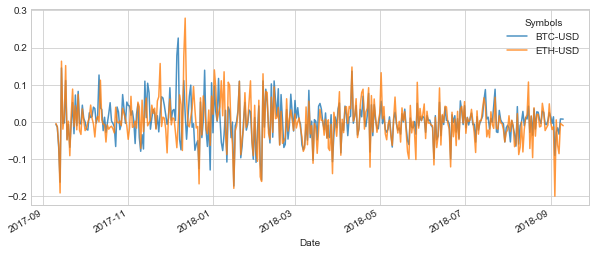

In [182]:
returns.plot(figsize=(10,4),alpha=0.8)

In [170]:
ETH['Daily Return'] = ETH['Adj Close'].pct_change()

In [171]:
BTC['Daily Return'] = BTC['Adj Close'].pct_change()

In [173]:
BTC['Daily Return'].describe()

count    365.000000
mean       0.002386
std        0.051052
min       -0.172351
25%       -0.022913
50%        0.002259
75%        0.027280
max        0.225515
Name: Daily Return, dtype: float64

In [174]:
ETH['Daily Return'].describe()

count    365.000000
mean       0.000530
std        0.058081
min       -0.199699
25%       -0.028056
50%       -0.000506
75%        0.033792
max        0.279043
Name: Daily Return, dtype: float64

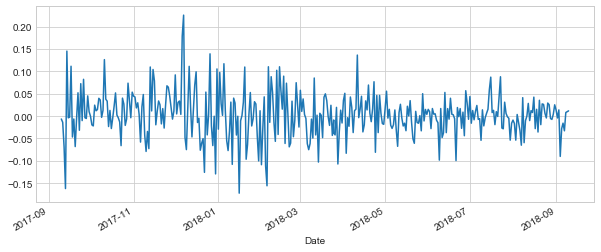

In [176]:
BTC['Daily Return'].plot(figsize=(10,4))

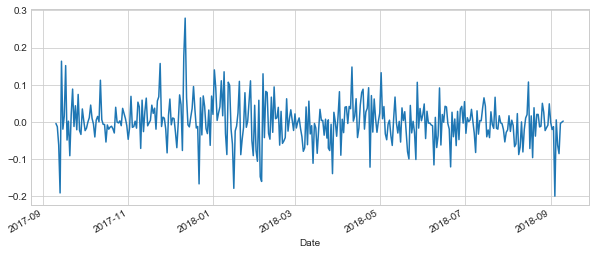

In [177]:
ETH['Daily Return'].plot(figsize=(10,4))

In [191]:
ETH['Daily Return'].mean()

0.0005295060779283644

In [184]:
BTC['Daily Return'].mean()

0.002386252865310126

In [203]:
#Making a box plot to visually see how the returns for each coin would be. 

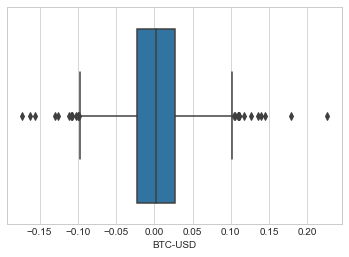

In [210]:
sns.boxplot(x='BTC-USD',data=returns)

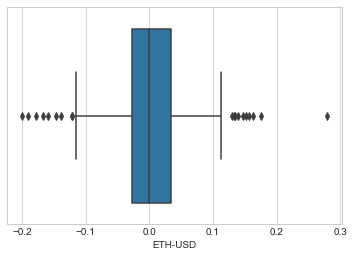

In [211]:
sns.boxplot(x='ETH-USD',data=returns)

In [212]:
#lets assess the risk of these coins 

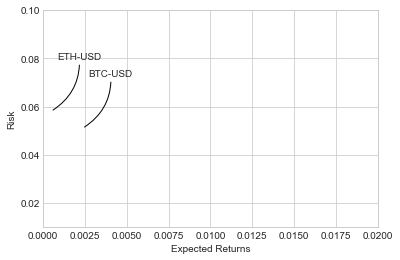

In [220]:
rets = returns.dropna()
area = np.pi*20
plt.xlabel('Expected Returns')
plt.ylabel('Risk')

plt.ylim([0.01,0.1])
plt.xlim([0.000,0.02])

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [234]:
BTC['Daily Return'] = BTC['Adj Close'].pct_change()

/Users/zaidshtayyeh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


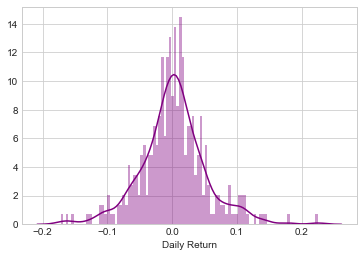

In [235]:
sns.distplot(BTC['Daily Return'].dropna(),bins=100,color='purple')

In [237]:
rets['BTC-USD'].quantile(0.05)

-0.07699028269450732

In [238]:
#The 0.05 empirical quantile of daily returns is at -0.077. 
#That means that with 95% confidence, our worst daily loss will not exceed 7.70%. 
#If we have a 1 million dollar investment, our one-day 5% VaR is -0.077 * 1,000,000 = $770,000.

In [239]:
#Now lets get into price estimation 

In [240]:
#mote-carlo method

# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = returns.mean()['ETH-USD']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = returns.std()['ETH-USD']

In [241]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5,1,'Monte Carlo Analysis for BTC')

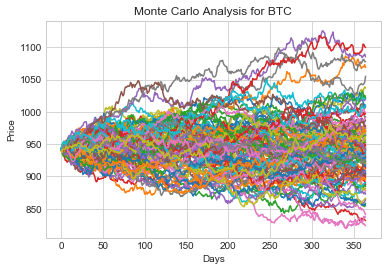

In [242]:
start_price = 941.53

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for BTC')